In [1]:
%pip install factor_analyzer

Note: you may need to restart the kernel to use updated packages.


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pandas.api.types import is_numeric_dtype
from scipy.stats import pearsonr
from factor_analyzer import FactorAnalyzer
from matplotlib.patches import Circle

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [5]:
df_freeLancerRaw = pd.read_csv('input/FreeLancerT.csv')
df_freeLancerRaw

,Country,CountryCode,Continent,C,C_Test,Html,Html_test,Java,Java_test,PHP,PHP_test
0,Aruba,ABW,NaN,1.918226,NaN,4.795565,0.959113,2.877339,0.000000,3.836452,0.000000
1,Angola,AGO,AF,0.023228,0.003871,0.011614,0.000000,0.023228,0.000000,0.019357,0.000000
2,Albania,ALB,EU,7.783173,0.241072,NaN,0.551021,6.956642,0.241072,12.397975,0.860970
3,Andorra,AND,EU,7.229090,0.000000,7.229090,1.445818,10.120726,0.000000,8.674908,1.445818
4,United Arab Emirates,ARE,AS,7.176023,0.291357,7.996140,0.291357,4.478270,0.140283,7.629246,0.151074
...,...,...,...,...,...,...,...,...,...,...,...
185,Vanuatu,VUT,OC,0.739454,0.000000,0.369727,0.000000,0.369727,0.000000,0.739454,0.000000
186,Samoa,WSM,OC,4.112624,0.000000,2.570390,0.514078,4.626702,0.000000,3.598546,0.514078
187,Yemen Rep.,YEM,AS,0.080065,0.000000,0.076426,0.007279,0.043672,0.000000,0.058229,0.003639
188,South Africa,ZAF,AF,1.109516,0.027283,1.227744,0.023645,0.836685,0.030921,1.113154,0.040015


In [8]:
df_freelancer_numerical = df_freeLancerRaw.iloc[:, 3:]
df_freelancer_numerical

,C,C_Test,Html,Html_test,Java,Java_test,PHP,PHP_test
0,1.918226,NaN,4.795565,0.959113,2.877339,0.000000,3.836452,0.000000
1,0.023228,0.003871,0.011614,0.000000,0.023228,0.000000,0.019357,0.000000
2,7.783173,0.241072,NaN,0.551021,6.956642,0.241072,12.397975,0.860970
3,7.229090,0.000000,7.229090,1.445818,10.120726,0.000000,8.674908,1.445818
4,7.176023,0.291357,7.996140,0.291357,4.478270,0.140283,7.629246,0.151074
...,...,...,...,...,...,...,...,...
185,0.739454,0.000000,0.369727,0.000000,0.369727,0.000000,0.739454,0.000000
186,4.112624,0.000000,2.570390,0.514078,4.626702,0.000000,3.598546,0.514078
187,0.080065,0.000000,0.076426,0.007279,0.043672,0.000000,0.058229,0.003639
188,1.109516,0.027283,1.227744,0.023645,0.836685,0.030921,1.113154,0.040015


In [13]:
for column in df_freelancer_numerical.columns:
    if is_numeric_dtype(df_freelancer_numerical[column]) and df_freelancer_numerical[column].isna().any():
        df_freelancer_numerical[column].fillna(df_freelancer_numerical[column].mean(), inplace=True)
df_freelancer_numerical
        

,C,C_Test,Html,Html_test,Java,Java_test,PHP,PHP_test
0,1.918226,0.140219,4.795565,0.959113,2.877339,0.000000,3.836452,0.000000
1,0.023228,0.003871,0.011614,0.000000,0.023228,0.000000,0.019357,0.000000
2,7.783173,0.241072,4.593976,0.551021,6.956642,0.241072,12.397975,0.860970
3,7.229090,0.000000,7.229090,1.445818,10.120726,0.000000,8.674908,1.445818
4,7.176023,0.291357,7.996140,0.291357,4.478270,0.140283,7.629246,0.151074
...,...,...,...,...,...,...,...,...
185,0.739454,0.000000,0.369727,0.000000,0.369727,0.000000,0.739454,0.000000
186,4.112624,0.000000,2.570390,0.514078,4.626702,0.000000,3.598546,0.514078
187,0.080065,0.000000,0.076426,0.007279,0.043672,0.000000,0.058229,0.003639
188,1.109516,0.027283,1.227744,0.023645,0.836685,0.030921,1.113154,0.040015


### 0_ Standardizam datele pentru mai bune rezultate

In [25]:
scaler = StandardScaler()
df_freelancer_scaled = pd.DataFrame(scaler.fit_transform(df_freelancer_numerical),
                                     columns=df_freelancer_numerical.columns)
df_freelancer_scaled

,C,C_Test,Html,Html_test,Java,Java_test,PHP,PHP_test
0,-0.210758,8.308614e-17,0.028161,0.197016,-0.107550,-0.468369,-0.151652,-0.196686
1,-0.353704,-4.081568e-01,-0.640136,-0.179024,-0.557956,-0.468369,-0.681605,-0.196686
2,0.231656,3.019011e-01,0.000000,0.037015,0.536203,0.162512,1.037001,0.133040
3,0.189860,-4.197456e-01,0.368114,0.387838,1.035526,-0.468369,0.520103,0.357019
4,0.185857,4.524307e-01,0.475267,-0.064791,0.145092,-0.101250,0.374927,-0.138829
...,...,...,...,...,...,...,...,...
185,-0.299677,-4.197456e-01,-0.590109,-0.179024,-0.503275,-0.468369,-0.581629,-0.196686
186,-0.045226,-4.197456e-01,-0.282686,0.022531,0.168516,-0.468369,-0.184682,0.000191
187,-0.349416,-4.197456e-01,-0.631082,-0.176170,-0.554730,-0.468369,-0.676208,-0.195292
188,-0.271761,-3.380735e-01,-0.470248,-0.169753,-0.429585,-0.387449,-0.529745,-0.181361


### 1_ Testul Bartlett pentru analiza factorabilitatii
- Pentru a calcula testul lui Bartlett folosim libraria factor_analyzer 
- Testul se aplica pe un dataframe care contine valorile numerice din dataframe

In [27]:
chi_square_val, p_val = calculate_bartlett_sphericity(df_freelancer_scaled)
print(f'chi_square_val: {chi_square_val} + p_val: {p_val}')

chi_square_val: 2719.016294773776 + p_val: 0.0


2_ Testul KMO pentru analiza factorabilitatii
- Pentru a calcula testul KMO folosim similar ca pentru Bartlett libraria factor_analyzer
- Testul se aplica pe un dataframe care contine valorile numerice din dataframe

In [31]:
kmo_all, kmo_model = calculate_kmo(df_freelancer_scaled)
print(f'Overall KMO: {kmo_all} + kmo_model: {kmo_model}')

Overall KMO: [0.86193151 0.7616424  0.67179183 0.60900846 0.80161914 0.72377295
 0.61769439 0.61119067] + kmo_model: 0.6943569290171081


### 3_ Calcul varianta factori 
- Pentru a calcula varianta factorilor folosim factor_analyzer
- Procedura se poate facu cu sau fara rotatie --> Rotatia este data de parametru rotation din instanta FactorAnalyzer
- Exista doua tipuri de rotatie
    - varimax
    - promax

### !! Inainte de a incepe sa calculam valori, dorim sa extragem doar acele componente care sunt semnificative !!
- Analiza factoriala precum si PCA lucreaza cu eigenvectori 
- Eigenvectorii reprezinta factorii din analize 
- Un factor este semnificativ daca suma componentelor sale este mai mare ca 1
- Calculcam n_values (numarul variabilelor semnificative) ca fiind acei eigenvectori care au suma valorilor mai mare ca 1

In [65]:
fa = FactorAnalyzer()
fa.fit(df_freelancer_scaled)
# criteriul lui Keiser 
# sunt semnificativi doar facorii care au eigen_value > 1
eigenvector, eigenvalue = fa.get_eigenvalues()
n_factors = sum(eigenvector > 1)
n_factors

2

In [66]:
fa = FactorAnalyzer(rotation=None, n_factors=n_factors)
fa.fit(df_freelancer_scaled)

variance = fa.get_factor_variance()
print(f'Varianta fara rotatie: {variance}')
#===================================================
fa = FactorAnalyzer(rotation='varimax', n_factors=n_factors)
fa.fit(df_freelancer_scaled)

variance = fa.get_factor_variance()
print(f'Varianta cu rotatie varimax: {variance}')

Varianta fara rotatie: (array([5.18123362, 1.69499676]), array([0.6476542 , 0.21187459]), array([0.6476542, 0.8595288]))
Varianta cu rotatie varimax: (array([3.85937141, 3.01685896]), array([0.48242143, 0.37710737]), array([0.48242143, 0.8595288 ]))


### 4_ Calcul corelatii factoriale
- Pentru a calculca corelatiile factoriale folosim proprietatea de loadings_ data de FactorAnalzer
- Pentru ca lucram cu FactorAnalyzer, calculul corelatiilor se poate face cu sau fara rotatie similar cu punctul (3)
    - Voi face doar cu rotatie pentru ca se primesc rezultate mai bune si codul ramane neschimbat

In [67]:
fa = FactorAnalyzer(rotation='varimax', n_factors=n_factors)
fa.fit(df_freelancer_scaled)

#creez un dataframe pentru a avea pe coloana numele variabilelor
factorial_correl = pd.DataFrame(fa.loadings_)

In [68]:
factorial_correl

,0,1
0,0.967712,0.223015
1,0.058255,0.826782
2,0.416952,0.877562
3,0.971391,0.108360
4,0.824374,0.467723
5,0.063236,0.734174
6,0.434525,0.847160
7,0.964188,0.161995


### 5_ Trasare corelograma pentru corelatii factoriale 
- Se foloseste heatmap din seaborn in care pasam corelatiile factoriale calculate la (4)

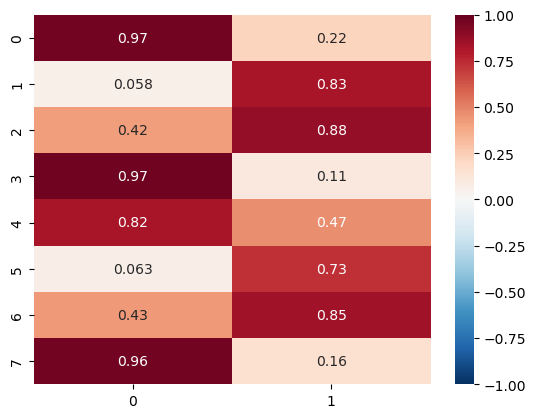

In [75]:
heatmap = sns.heatmap(
    factorial_correl,
    annot=True,
    cmap = "RdBu_r",
    vmin = -1,
    vmax = 1 
)

### 5.1_ Trasare corelograma cu toate componentele --> chair si cele nesemnificiative 
- !! Metoda nu e corecta pentru ca nu am eliminat componentele nesemnificative dar graficul arata mai full

In [80]:
fa = FactorAnalyzer(rotation="varimax", n_factors=8)
fa.fit(df_freelancer_scaled)

df_factorial_correl_all = pd.DataFrame(fa.loadings_, df_freelancer_scaled.columns)
df_factorial_correl_all

,0,1,2,3,4,5,6,7
C,0.938632,0.272059,0.077632,0.053959,0.108262,0.000337,0.075029,0.0
C_Test,0.058419,0.385178,0.338765,0.853404,0.012647,-0.002304,0.000246,0.0
Html,0.360402,0.783627,0.318617,0.364454,-0.000920,0.129246,0.000552,0.0
Html_test,0.983172,0.126000,0.058380,0.046124,-0.049539,0.054383,-0.040162,0.0
Java,0.795755,0.448549,0.235214,0.104512,0.306219,-0.004493,0.004227,0.0
Java_test,0.061222,0.301521,0.870719,0.287865,0.021972,0.000553,0.001050,0.0
PHP,0.366132,0.810065,0.294718,0.320625,0.047899,-0.113111,0.003748,0.0
PHP_test,0.966799,0.201556,0.012593,0.101525,-0.076773,-0.053376,-0.023175,0.0


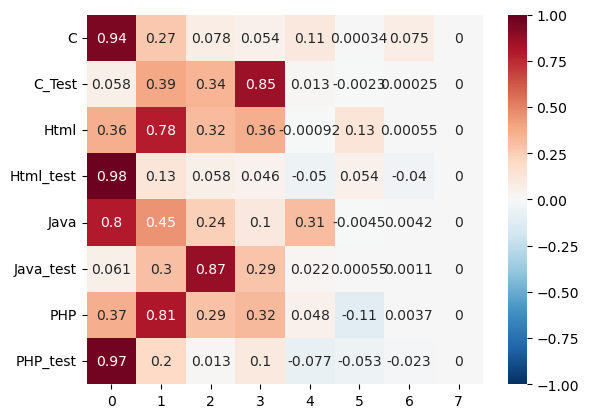

In [82]:
heatmap = sns.heatmap(
    df_factorial_correl_all,
    annot=True,
    vmin=-1,
    vmax=1,
    cmap = "RdBu_r"
)

### 6_ Trasare cercul corelatiilor

/run/user/1000/ipykernel_69441/1019864807.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


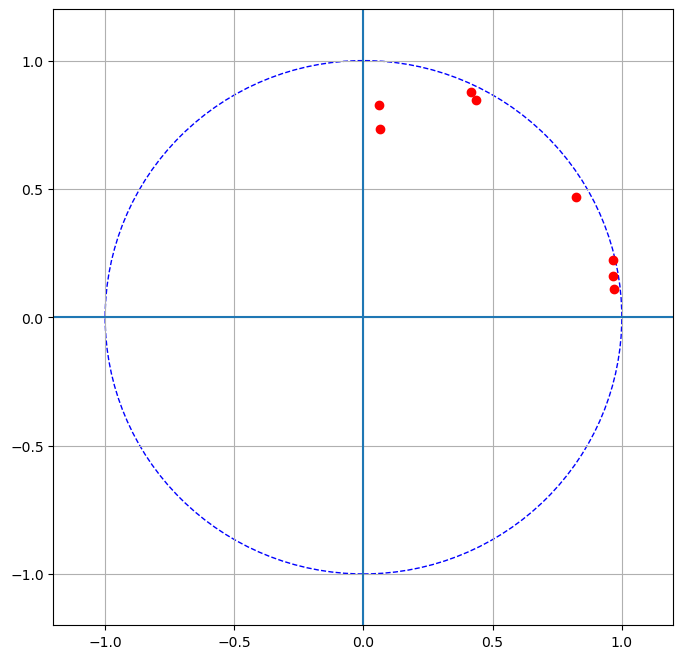

In [102]:
fig, ax = plt.subplots(figsize=(8,8))
circle = Circle((0,0), 1, color="blue", linestyle="--", fill=False)
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.axhline(0,0)
ax.axvline(0,0)
ax.add_patch(circle)
ax.scatter(factorial_correl.iloc[:, 0], factorial_correl.iloc[:, 1], color="red")
plt.grid(True)
fig.show()


### 7_ Calcul comunalitati si varianta specifica
- Nu e nevoie de explicatii aici

In [113]:
fa = FactorAnalyzer(n_factors=n_factors)
fa.fit(df_freelancer_scaled)

communaities = fa.get_communalities()
specific_variance = 1 - communaities

In [115]:
print(f"communalities: {communaities} \nspecific_variance: {specific_variance}")

communalities: [1.00506431 0.82322022 0.77017386 1.09863773 0.6879219  0.6406525
 0.71944076 1.03800574] 
specific_variance: [-0.00506431  0.17677978  0.22982614 -0.09863773  0.3120781   0.3593475
  0.28055924 -0.03800574]


### 8_ Trasare corelograma comunalitati si varianta specifica

### 9_ Calcularea scorurilor

### 10_ Trasare plot scoruri